In [1]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2



--- Assignment 3: Binary Text Classification (IMDB) ---
Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 51s 3us/step 
Number of training samples: 25000
Number of test samples: 25000
Preprocessing IMDB data (padding sequences)...
x_train_imdb shape after padding: (25000, 200)
x_test_imdb shape after padding: (25000, 200)
Building simple IMDB classifier model...


/Users/aditya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "imdb_classifier_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling                         │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense (Dense)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_sigmoid (Dense)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compiling IMDB model...
Training IMDB model...
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5705 - loss: 0.6900 - val_accuracy: 0.7294 - val_loss: 0.6700
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6994 - loss: 0.6589 - val_accuracy: 0.7714 - val_loss: 0.6039
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7625 - loss: 0.5857 - val_accuracy: 0.8154 - val_loss: 0.5064
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8109 - loss: 0.4878 - val_accuracy: 0.8430 - val_loss: 0.4240
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8370 - loss: 0.4118 - val_accuracy: 0.8544 - val_loss: 0.3737
Evaluating IMDB model...
Test Loss: 0.3775
Test Accuracy: 0.8510
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 4s 2us/step

Predicting sentiment for first 5 test reviews:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Review 1:
Predicted Sentiment: Negative (Score: 0.398)
Actual Sentiment: Negative

Review 2:
Predicted Sentiment: Positiv

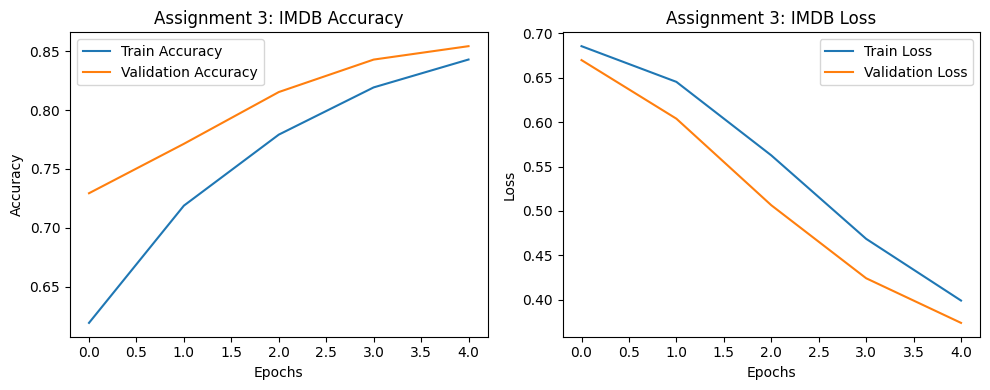

In [2]:
# ==============================================
# Assignment 3: Binary Text Classification (IMDB)
# ==============================================
print("\n--- Assignment 3: Binary Text Classification (IMDB) ---")

# --- 1. Load and Prepare the IMDB Dataset ---
print("Loading IMDB dataset...")
max_features = 10000  # Limit vocabulary size
maxlen = 200  # Pad sequences to this length

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = keras.datasets.imdb.load_data(num_words=max_features)

print(f"Number of training samples: {len(x_train_imdb)}")
print(f"Number of test samples: {len(x_test_imdb)}")

# --- 2. Preprocess Data ---
print("Preprocessing IMDB data (padding sequences)...")
x_train_imdb = keras.preprocessing.sequence.pad_sequences(x_train_imdb, maxlen=maxlen)
x_test_imdb = keras.preprocessing.sequence.pad_sequences(x_test_imdb, maxlen=maxlen)

print(f"x_train_imdb shape after padding: {x_train_imdb.shape}")
print(f"x_test_imdb shape after padding: {x_test_imdb.shape}")

# --- 3. Define the Model Architecture (Simple Embedding + Dense) ---
print("Building simple IMDB classifier model...")
embedding_dim = 32

model_imdb_simple = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen, name="embedding"),
    layers.GlobalAveragePooling1D(name="pooling"), # Or Flatten()
    layers.Dense(32, activation='relu', name="hidden_dense"),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', name="output_sigmoid") # Binary classification
], name="imdb_classifier_simple")

model_imdb_simple.summary()

# --- 4. Compile the Model ---
print("Compiling IMDB model...")
model_imdb_simple.compile(optimizer='adam',
                          loss='binary_crossentropy', # For binary classification
                          metrics=['accuracy'])

# --- 5. Train the Model ---
print("Training IMDB model...")
epochs_imdb = 5 # Reduced for quick demo
batch_size_imdb = 512
history_imdb = model_imdb_simple.fit(x_train_imdb, y_train_imdb,
                                     epochs=epochs_imdb,
                                     batch_size=batch_size_imdb,
                                     validation_split=0.2,
                                     verbose=1)

# --- 6. Evaluate the Model ---
print("Evaluating IMDB model...")
loss_imdb, accuracy_imdb = model_imdb_simple.evaluate(x_test_imdb, y_test_imdb, verbose=0)
print(f"Test Loss: {loss_imdb:.4f}")
print(f"Test Accuracy: {accuracy_imdb:.4f}")

# --- 7. Make Predictions (Optional) ---
# Get word index for decoding (optional, for viewing text)
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text_indices):
    # Indices are offset by 3: 0=padding, 1=start, 2=unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_indices])

# Predict on a few test samples
print("\nPredicting sentiment for first 5 test reviews:")
predictions_imdb = model_imdb_simple.predict(x_test_imdb[:5])
for i in range(5):
    print(f"\nReview {i+1}:")
    #print(decode_review(x_test_imdb[i])) # Can be long
    sentiment = "Positive" if predictions_imdb[i][0] > 0.5 else "Negative"
    print(f"Predicted Sentiment: {sentiment} (Score: {predictions_imdb[i][0]:.3f})")
    print(f"Actual Sentiment: {'Positive' if y_test_imdb[i] == 1 else 'Negative'}")


# --- Plot training history (Optional) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_imdb.history['accuracy'], label='Train Accuracy')
plt.plot(history_imdb.history['val_accuracy'], label='Validation Accuracy')
plt.title('Assignment 3: IMDB Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_imdb.history['loss'], label='Train Loss')
plt.plot(history_imdb.history['val_loss'], label='Validation Loss')
plt.title('Assignment 3: IMDB Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()